In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv(r'C:\Users\lalin\Downloads\Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

In [9]:
df = df.dropna(subset=['Order Date'])

In [11]:
df = df.drop_duplicates()

In [13]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [15]:
print("Shape:", df.shape)

Shape: (4042, 11)


In [17]:
print("Date Range:", df['Order Date'].min(), "to", df['Order Date'].max())

Date Range: 2015-01-02 00:00:00 to 2018-12-11 00:00:00


In [19]:
print(df[['Sales', 'Discount', 'Profit']].describe())

             Sales     Discount       Profit
count  4042.000000  4042.000000  4042.000000
mean   1497.649678     0.226455   371.860225
std     574.053006     0.074268   239.387373
min     500.000000     0.100000    26.850000
25%    1008.000000     0.160000   179.550000
50%    1494.500000     0.230000   319.635000
75%    1998.750000     0.290000   520.567500
max    2500.000000     0.350000  1120.950000


In [21]:
print("\nUnique Categories:", df['Category'].nunique())


Unique Categories: 7


In [23]:
print("Unique Sub Categories:", df['Sub Category'].nunique())

Unique Sub Categories: 23


In [25]:
print("Unique Cities:", df['City'].nunique())

Unique Cities: 24


C:\Users\lalin\AppData\Local\Temp\ipykernel_2848\907240922.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('Order Date').resample('M')[['Sales', 'Profit']].sum()
C:\Users\lalin\AppData\Local\Temp\ipykernel_2848\907240922.py:12: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\lalin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lalin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


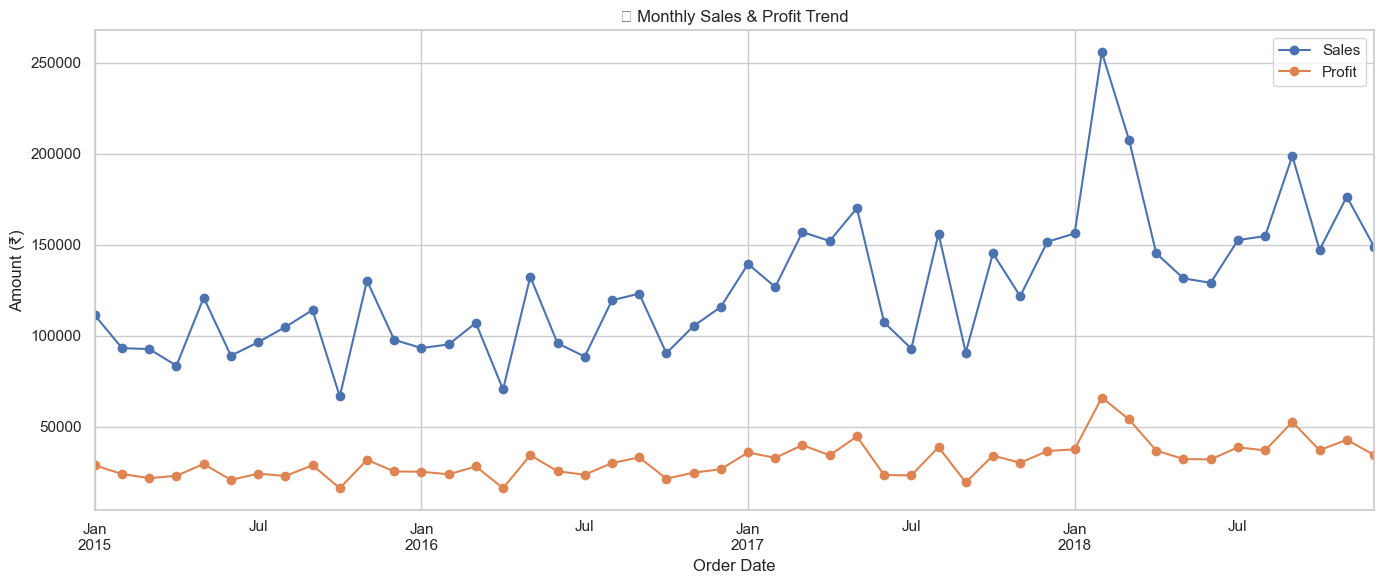

In [27]:
# Set style
sns.set(style="whitegrid")

# Monthly trend
monthly = df.set_index('Order Date').resample('M')[['Sales', 'Profit']].sum()

# Plot
monthly.plot(figsize=(14, 6), marker='o')
plt.title("📅 Monthly Sales & Profit Trend")
plt.ylabel("Amount (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\lalin\AppData\Local\Temp\ipykernel_2848\4011603709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Category')['Sales'].sum().reset_index(), x='Category', y='Sales', palette='Set2')


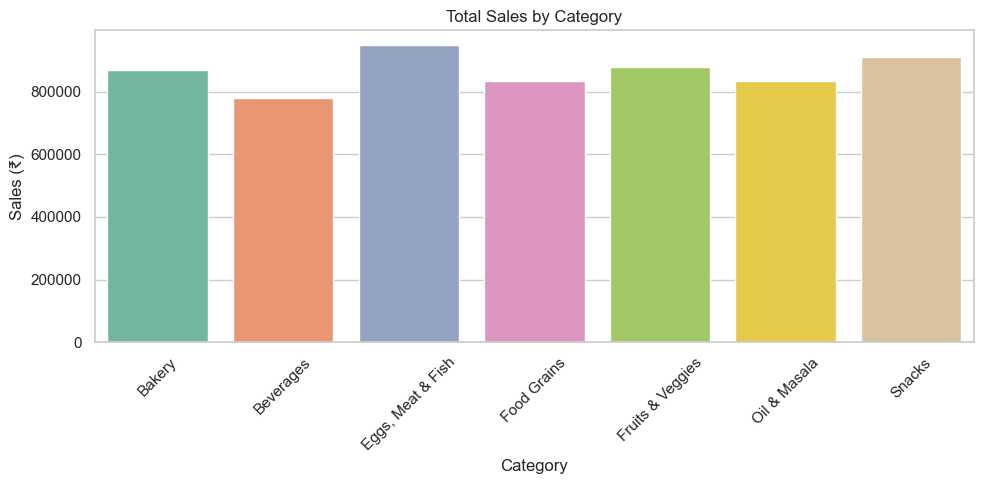

C:\Users\lalin\AppData\Local\Temp\ipykernel_2848\4011603709.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_sales.index, y=subcat_sales.values, palette='viridis')


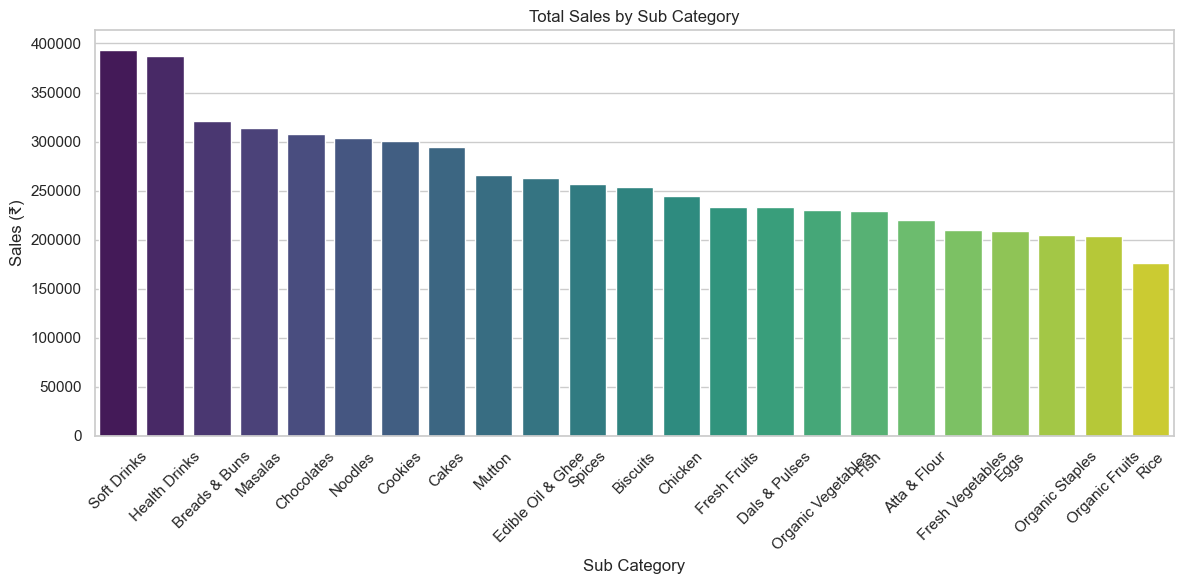

In [29]:
# Top Categories
plt.figure(figsize=(10, 5))
sns.barplot(data=df.groupby('Category')['Sales'].sum().reset_index(), x='Category', y='Sales', palette='Set2')
plt.title("Total Sales by Category")
plt.ylabel("Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top Subcategories
plt.figure(figsize=(12, 6))
subcat_sales = df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=subcat_sales.index, y=subcat_sales.values, palette='viridis')
plt.title("Total Sales by Sub Category")
plt.ylabel("Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\lalin\AppData\Local\Temp\ipykernel_2848\3368646284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Region')['Profit'].sum().reset_index(), x='Region', y='Profit', palette='coolwarm')


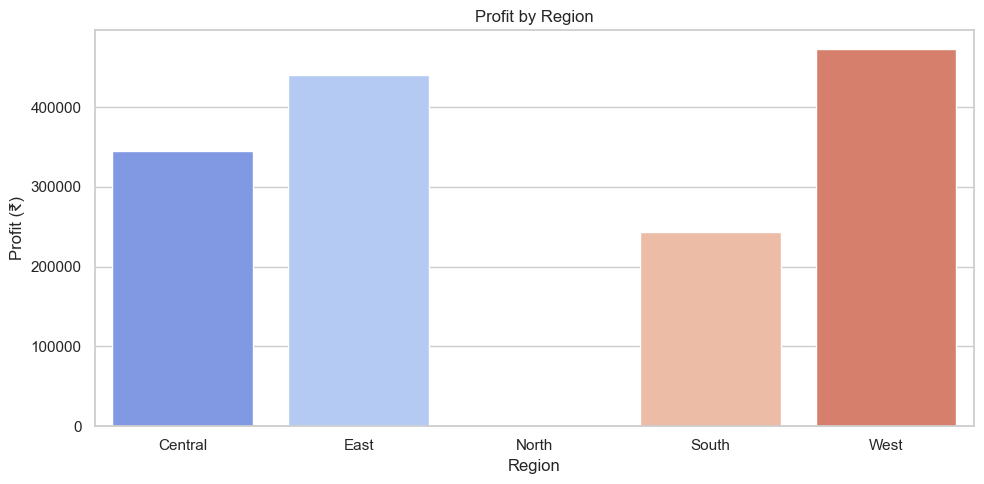

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df.groupby('Region')['Profit'].sum().reset_index(), x='Region', y='Profit', palette='coolwarm')
plt.title("Profit by Region")
plt.ylabel("Profit (₹)")
plt.tight_layout()
plt.show()


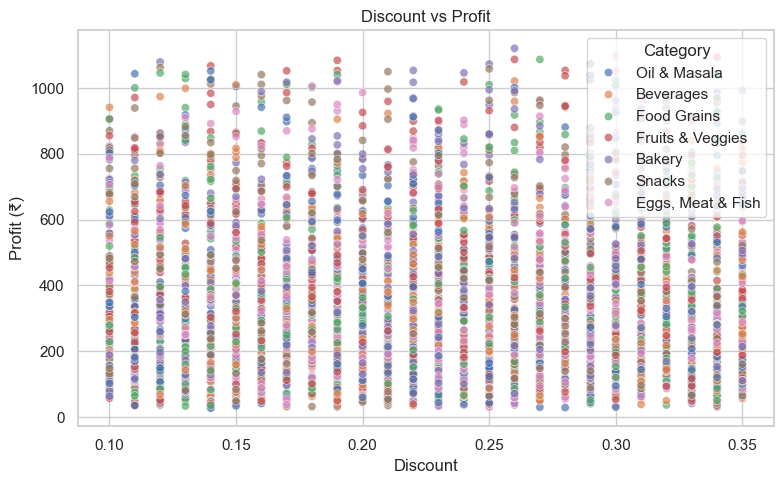

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit (₹)")
plt.tight_layout()
plt.show()


C:\Users\lalin\AppData\Local\Temp\ipykernel_2848\3173031401.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='Blues_r')


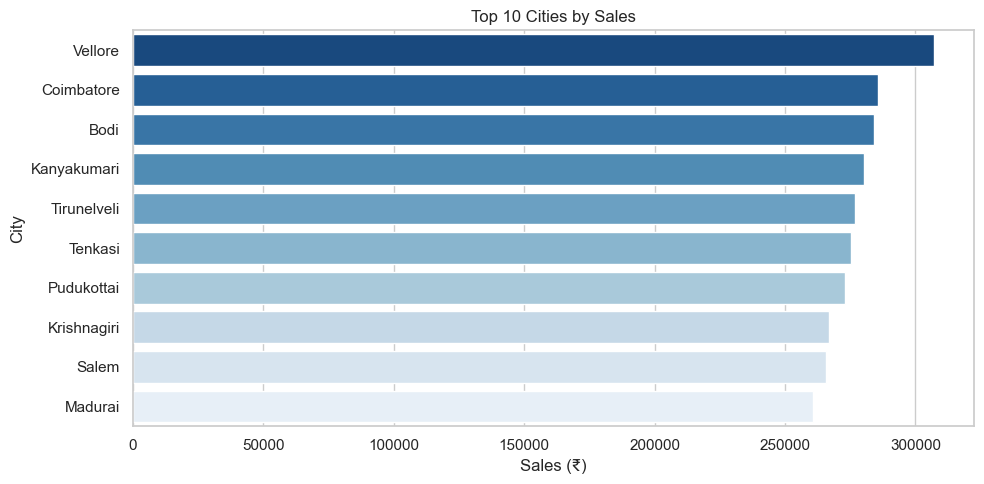

In [35]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Blues_r')
plt.title("Top 10 Cities by Sales")
plt.xlabel("Sales (₹)")
plt.ylabel("City")
plt.tight_layout()
plt.show()


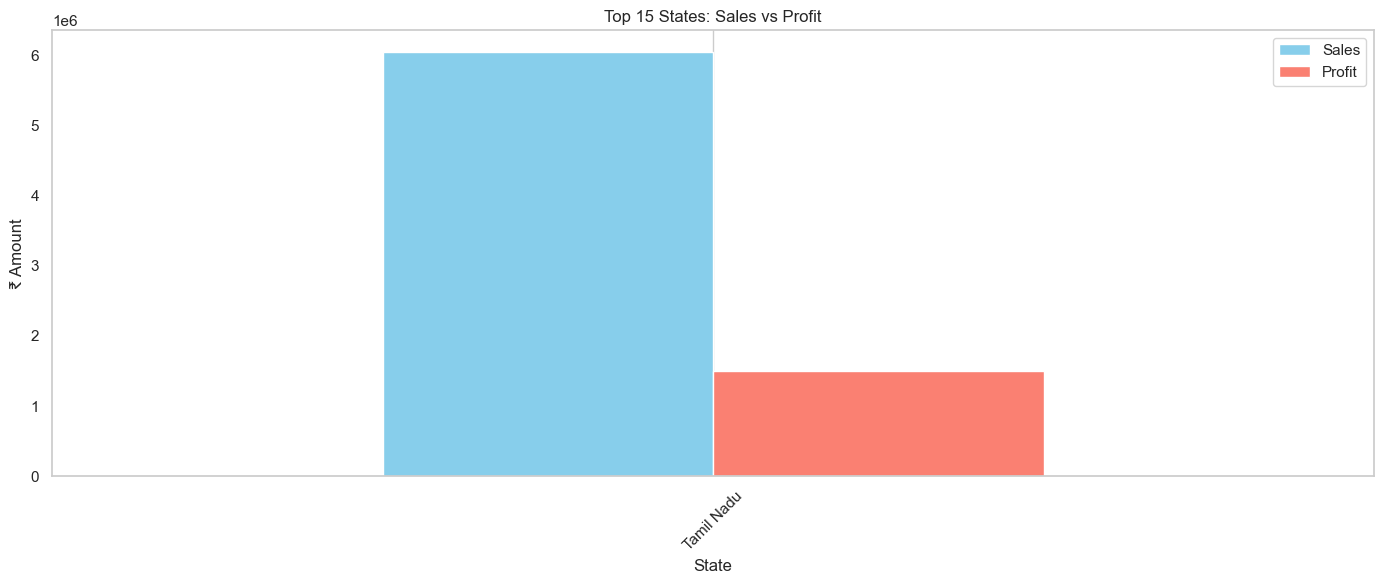

In [37]:
state_perf = df.groupby('State')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False).head(15)

# Plot
state_perf.plot(kind='bar', figsize=(14, 6), color=['skyblue', 'salmon'])
plt.title("Top 15 States: Sales vs Profit")
plt.ylabel("₹ Amount")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\lalin\AppData\Local\Temp\ipykernel_2848\1956139710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_profit.index, y=subcat_profit.values, palette='RdYlGn')


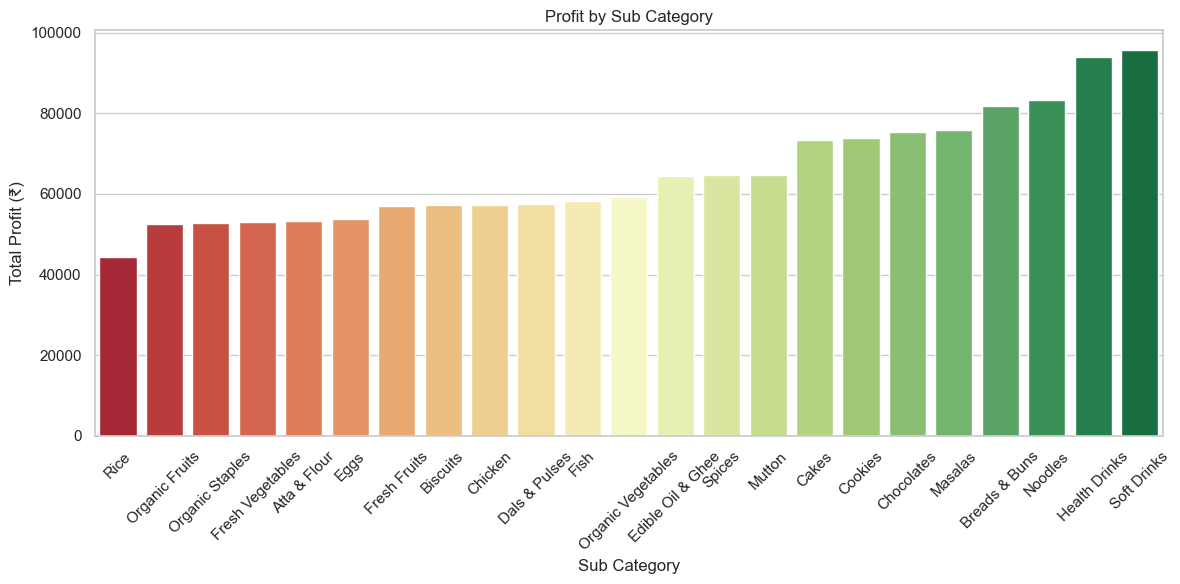

In [39]:
plt.figure(figsize=(12, 6))
subcat_profit = df.groupby('Sub Category')['Profit'].sum().sort_values()
sns.barplot(x=subcat_profit.index, y=subcat_profit.values, palette='RdYlGn')
plt.title("Profit by Sub Category")
plt.xticks(rotation=45)
plt.ylabel("Total Profit (₹)")
plt.tight_layout()
plt.show()


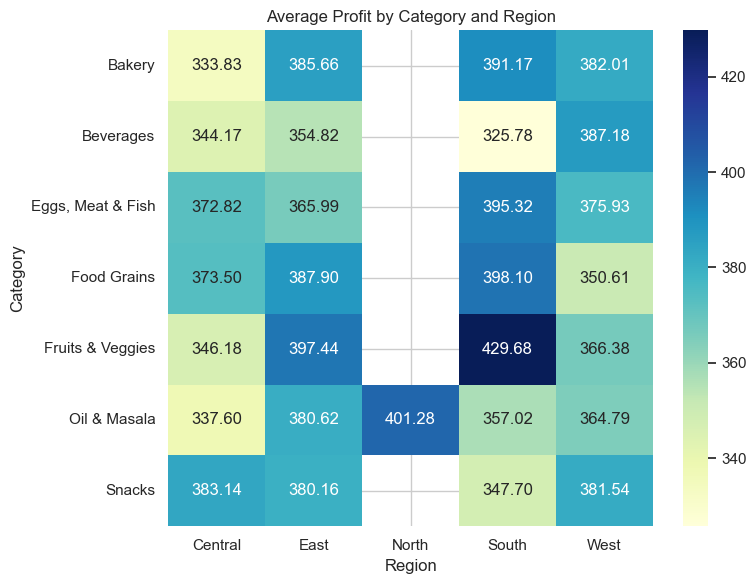

In [41]:
pivot_table = df.pivot_table(values='Profit', index='Category', columns='Region', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Average Profit by Category and Region")
plt.tight_layout()
plt.show()


C:\Users\lalin\AppData\Local\Temp\ipykernel_2848\2007810836.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_per_month = df.resample('M', on='Order Date').size()


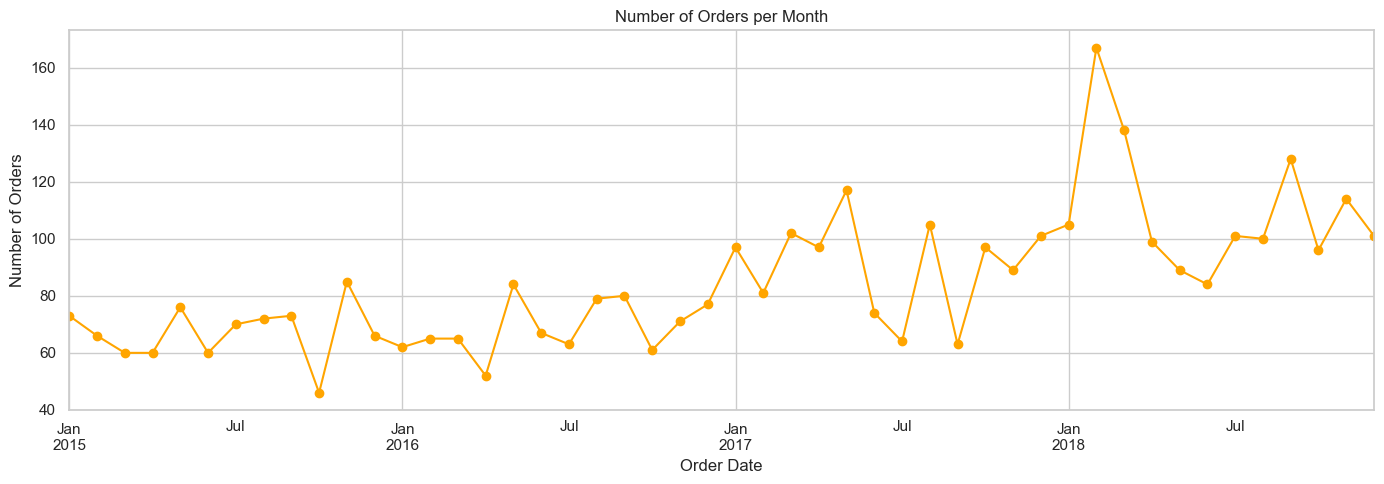

In [43]:
orders_per_month = df.resample('M', on='Order Date').size()

plt.figure(figsize=(14, 5))
orders_per_month.plot(marker='o', color='orange')
plt.title("Number of Orders per Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()


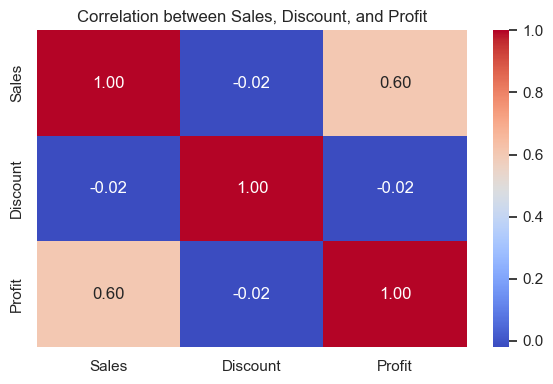

In [45]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Sales', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Sales, Discount, and Profit")
plt.tight_layout()
plt.show()


C:\Users\lalin\AppData\Local\Temp\ipykernel_2848\2935076902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Profit', palette='Set3')


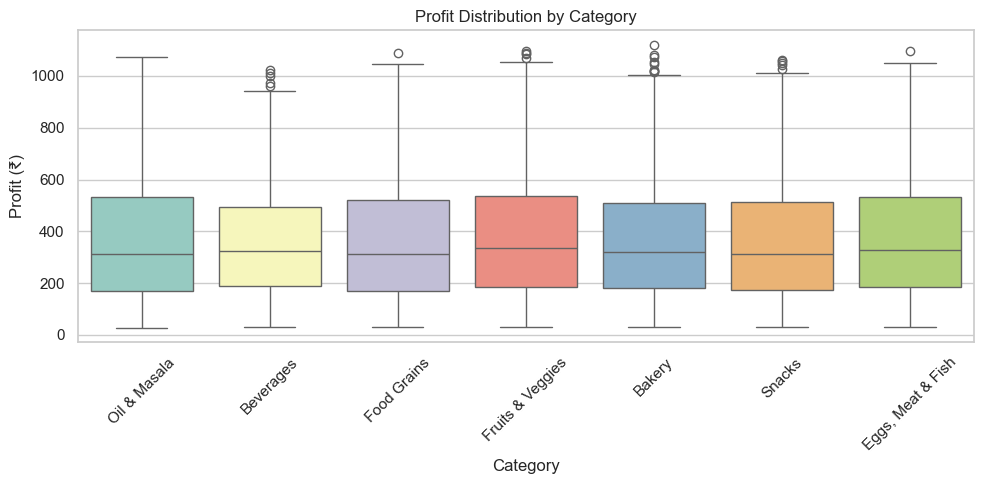

In [47]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Category', y='Profit', palette='Set3')
plt.title("Profit Distribution by Category")
plt.ylabel("Profit (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [51]:

df_ml = df.copy()


df_ml['Year'] = df_ml['Order Date'].dt.year
df_ml['Month'] = df_ml['Order Date'].dt.month
df_ml['DayOfWeek'] = df_ml['Order Date'].dt.dayofweek


df_ml = pd.get_dummies(df_ml, columns=['Category', 'Sub Category', 'City', 'Region', 'State'], drop_first=True)

# Drop unnecessary columns
df_ml.drop(['Order ID', 'Customer Name', 'Order Date'], axis=1, inplace=True)

# Separate features and target
X = df_ml.drop('Profit', axis=1)
y = df_ml['Profit']


In [53]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    print(f"📈 {name} Evaluation:")
    print(f"R² Score       : {r2_score(y_test, y_pred):.4f}")
    print(f"MAE            : {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE           : {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print("-" * 30)

# Evaluate all models
evaluate_model(lr, X_test, y_test, "Linear Regression")
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(gb, X_test, y_test, "Gradient Boosting")


📈 Linear Regression Evaluation:
R² Score       : 0.3545
MAE            : 153.84
RMSE           : 189.67
------------------------------
📈 Random Forest Evaluation:
R² Score       : 0.2957
MAE            : 158.32
RMSE           : 198.12
------------------------------
📈 Gradient Boosting Evaluation:
R² Score       : 0.3424
MAE            : 153.89
RMSE           : 191.45
------------------------------


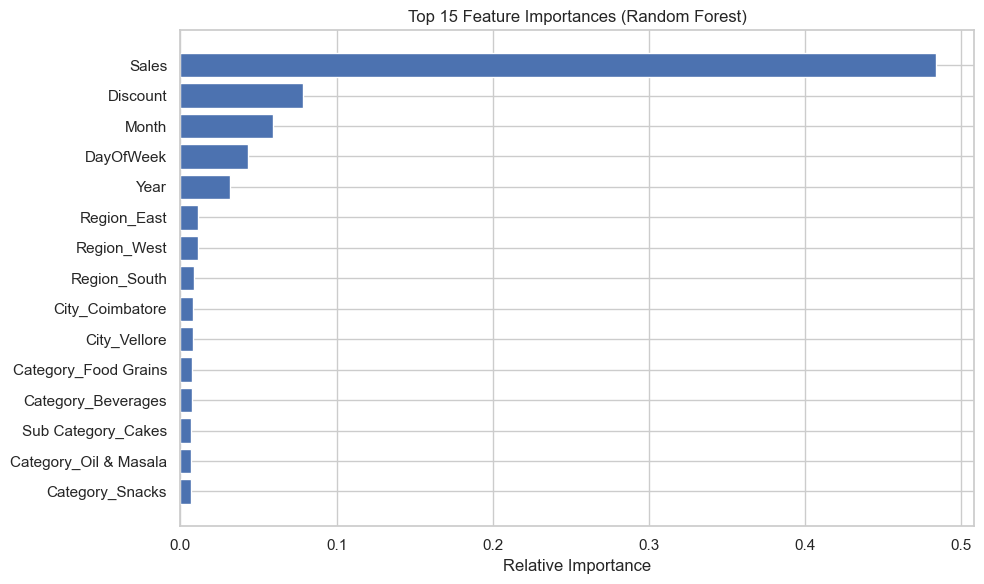

In [59]:
# Feature Importance from Random Forest
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[-15:]  # Top 15

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()
